<img src='./figures/logo_ecole_polytechnique_IPP.png' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center><i>Algorithms for Discrete Mathematics</i>, year 2, semester 1</center>

# Experimental Maths 2: Test


## Table of contents



In [18]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [19]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

import sympy as sympy             # package for symbolic computation
from sympy import *

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)


**A few comments before starting:** (not in any order of importance)

- The project is individual.
- Some questions need to be done in order, but not all.
- You are more than welcome to propose additional questions or ideas related to the project (originality will be rewarded and is necessary to get A+). There are several ideas (around Markov chains, generating functions, etc.) that could be explored (do ask me if you want to make sure you're not going in the wrong direction). However, you do not need to do anything groundbreaking or that works perfectly to score marks; the most important thing is that you show initiative.
- This will not be graded like your tests, so make sure your answers are presented clearly (that also means concisely) and cleanly. I will take presentation into account when marking your project (make sure you use LaTeX when writing your answers, or I will not read them).
- It is better to take the time to do a few questions cleanly than to botch all the questions.
- You are expected to comment/explain your code.
- Provide tests to all your functions.
- You should justify your answers as rigorously as possible (though any result that SymPy outputs can be taken as proof).
- It is strongly discouraged to introduce any notions more advanced than second-year university if you do not understand them (if you are not sure, ask me).

The marking scheme will be as follows:
- 70% on the answers to questions (10% per question, so you don't need to do all the questions. If you do them all and, say, you score 71 points, then this mark will be capped at 70).
- 10% on overall presentation (presentation, clarity, and conciseness will also count towards the above 70%).
- 20% on originality (answering the more open-ended questions or complementing some questions will also count towards originality).

Consider the map
\begin{align}
    f: [0,1] &\longrightarrow [0,1] \\
    x&\longmapsto \mu x(1-x)
\end{align}
for $\mu \in [1, 4]$ and the dynamical system
$$x_{n+1} = f(x_n)$$
We denote by $f^{n}$ the function $f$ iterated $n$ times.

1. For different values of $\mu$, simulate this dynamical system for a large number of iterations and plot the last few iterations. Analyse your results.
   

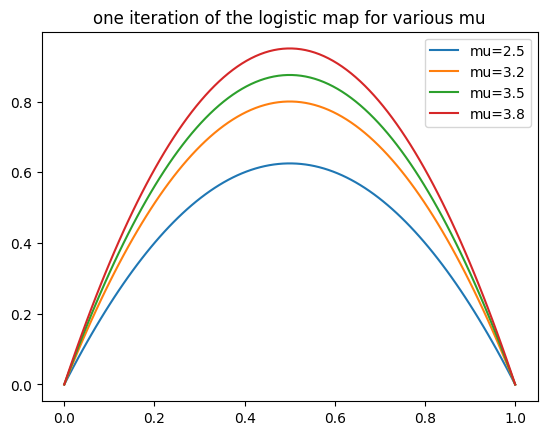

In [20]:
#first, let's give the function definition and plot a few iterations of the logistic map

def f (x=0.2, mu=3.5): #default parameters given for simplicity
    return mu*x*(1-x)
plt.figure()
for mu in [2.5, 3.2, 3.5, 3.8]:
    x = np.linspace(0, 1, 100)
    y = f(x, mu)
    plt.plot(x, y, label=f"mu={mu}")
plt.title("one iteration of the logistic map for various mu")
plt.legend()
plt.show()



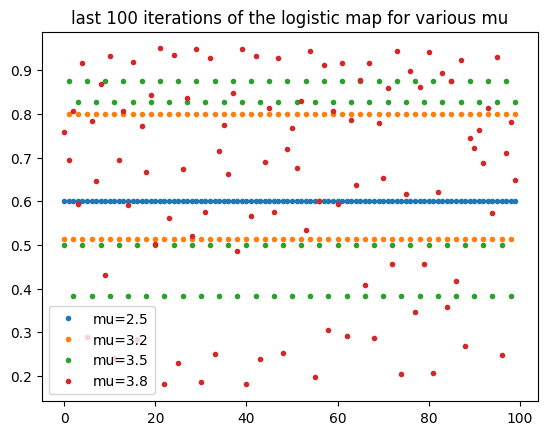

In [21]:
#this wraper iterates f multiple times and returns the last values
def logistic(mu, x0=0.2, iter=1000, last=100):
    x = x0
    # skip transients
    for _ in range(iter-last):
        x = mu * x * (1-x)
    xs = []
    for _ in range(last):
        x = mu * x * (1-x)
        xs.append(x)
    return xs
plt.figure()
for mu in [2.5, 3.2, 3.5, 3.8]:
    xs = logistic(mu)
    plt.plot(xs, '.', label=f"mu={mu}")

plt.title("last 100 iterations of the logistic map for various mu")
plt.legend()
plt.show()

In [22]:
# the following two cells render an interactive plot with a slider for \mu

# NEEDS
# python -m pip install ipympl
# pip install ipywidgets
# note that you have to make sure you run both these commands before running this and the below cell

%matplotlib widget

from ipywidgets import FloatSlider
from IPython.display import display



FloatSlider(value=3.5, description='μ', max=4.0, min=1.0, step=0.01)

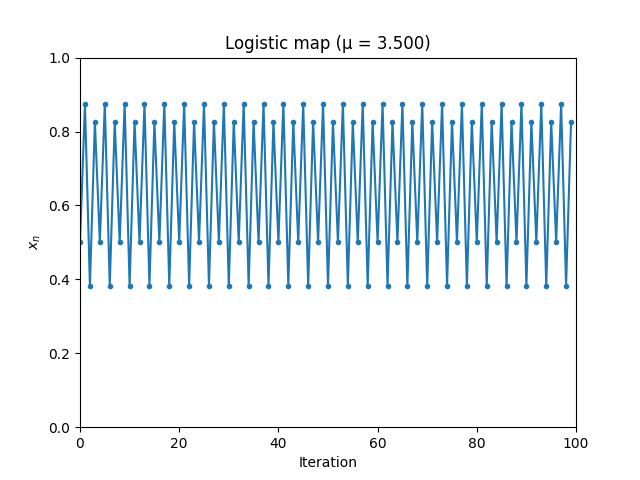

In [23]:
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', markersize=3)
ax.set_ylim(0, 1)
ax.set_xlabel("Iteration")
ax.set_ylabel("$x_n$")

def update(mu):
    y = logistic(mu, 0.1)
    line.set_data(range(len(y)), y)
    ax.set_xlim(0, len(y))
    ax.set_title(f"Logistic map (μ = {mu:.3f})")
    fig.canvas.draw_idle()

slider = FloatSlider(
    min=1.0,
    max=4.0,
    step=0.01,
    value=3.5,
    description='μ'
)

slider.observe(lambda change: update(change['new']), names='value')

display(slider)
update(slider.value)


One question that arises is whether the initial value of $x_0$ is relevant.

First, note that for $x_0 \in \{0,1\}$, $x_n = 0, \forall n$.

To study the cases when $ x_0 \in (0,1) $ this, we can "forsee" a few cases:
1) $\mu \in (1,3)$
2) $\mu \in (3,\mu_\infty)$
3) $\mu \in (\mu_\infty, 4)$

Case 1:
$f(x) = \mu \cdot x (1-x)$, so $f'(x) = \mu (1 - 2x)$ 

Notice that $x^* = 1 - \frac{1}{\mu}$ is a fixed point (i.e. $f(x^*) = x^*$)

Then, $\forall x \in (0,1)$, $|x^* - x_{n+1}| = |f(x^*) - f(x_n)| = |f'(c)||x^*-x_n|$,

for some $c \in [min\{x^*,x_n\},max\{x^*,x_n\}]$. It is easy to notice that $|f'(c)| < |f'(x^*)| = |\mu-2|$

$=> f'(c) < 1$, $ \forall c \in [\frac{1}{\mu},1-\frac{1}{\mu}]$

This means that $\forall x \in [\frac{1}{\mu},1-\frac{1}{\mu}]$, $|x^*-x_{n+1}| < |x^* - x_n|$, so $x_n \longrightarrow x^*$

Case 2: 
Here, the sequence has more (2 4 8 ...) converging subsequences

Case 3: 
if $x > x_\infty$, the sequence is simply chaotic.


FloatSlider(value=3.5, description='μ', max=3.6, min=3.5, step=0.001)

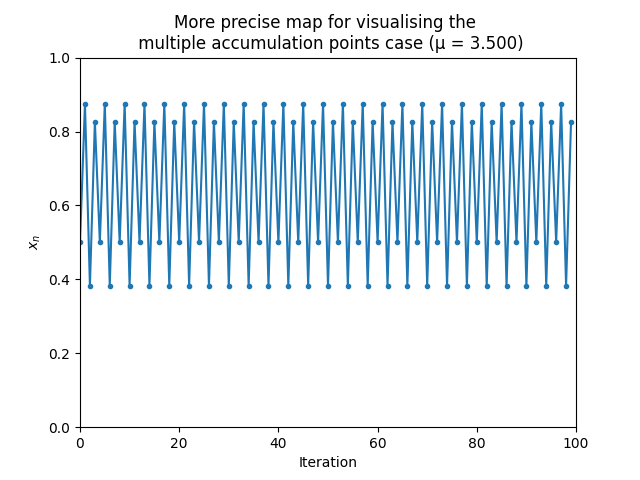

In [24]:
# illustrate the bifurcation diagram
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', markersize=3)
ax.set_ylim(0, 1)
ax.set_xlabel("Iteration")
ax.set_ylabel("$x_n$")

def update(mu):
    y = logistic(mu, 0.1)
    line.set_data(range(len(y)), y)
    ax.set_xlim(0, len(y))
    ax.set_title(f"More precise map for visualising the \n multiple accumulation points case (μ = {mu:.3f})")
    fig.canvas.draw_idle()

slider = FloatSlider(
    min=3.5,
    max=3.6,
    step=0.001,
    value=3.5,
    description='μ'
)

slider.observe(lambda change: update(change['new']), names='value')

display(slider)
update(slider.value)

2. Using SymPy, determine for which values of $\mu$ the dynamical system has an exponentially stable two-periodic point. We say that a periodic point $x^*$ is exponentially stable if there exist $\delta>0$ and $r \in (0,1)$ such that for all $x \in (x^* - \delta, x^* + \delta)$ and $n \in \mathbb{N}$
    $$|x^* - f^{2n}(x)|\leq r^n|x^*-x|.$$

($x^*$ is a 2-periodic point) 

For these values of $\mu$, find $\rho$ such that for all $x_0\in (x^* - \delta, x^* + \delta)$,
$$\lim_{n\to\infty}\frac{|x_{2n+2}-x^*|}{|x_{2n}-x^*|} = \rho$$
Check the value you found numerically.

In [25]:
import sympy as sp

x, mu = sp.symbols('x mu', real=True)

f = mu*x*(1-x)
f2 = sp.simplify(f.subs(x, f))     # f(f(x))
df2 = sp.simplify(sp.diff(f2, x))

sp.factor(f2), sp.factor(df2)

sol = sp.solve(f2 - x, x)
sol

xstar = sol[2]   # one of the two-cycle points
rho = sp.simplify(df2.subs(x, xstar))
sp.factor(rho)

-mu**2 + 2*mu + 4

In order that $|x^* - f^{2n}(x)|\leq r^n|x^*-x|$
holds, we need $|x^* - f^{2}(x)| < |x^*-x|$ <=> $|\frac{df^2}{dx}(x^*)| < 1$

This condition is sufficient, because we can pick $\delta $ such that $ \sup_{x \in [x^*-\delta,\; x^*+\delta]} |f'(x)| < 1$, then we pick 

$r = \sup_{x \in [x^*-\delta,\; x^*+\delta]} |f'(x)| $

Now, for any $ x \in [x^*-\delta,\; x^*+\delta]$, by mean value theorem, $|f^2(x^*) - f^2(x)| \leq r \cdot |x^*-x|$ => $|x^* - f^2(x)| \leq r \cdot |x^*-x|$

Hence, for any $n \in \mathbb{N}$, $|x^* - f^{2n}(x)|\leq r^n|x^*-x|$, so $lim_{n \rightarrow \infty} |x^* - x_{2n}| = 0 $

Since $f^2$ is at least $C^1$, we get that $\rho = (f^2)'(x^*)$, by passing to the limit in the mean value theorem

3. For the rest of the project, assume $\mu = 4$. Let $(y_n)_{n\geq 0}$ be the sequence defined by recursion

    \begin{align*}
        y_0 &= 1/2\\
        y_{n+1} &= S(y_n)\qquad \text{for } n \geq 1
    \end{align*}
    
   where for a twice-continuously differentiable function $g$,
   $$S(y) = y - \frac{g(y)}{g'(y)}.$$
   Assume that $\lim_{n\to\infty}y_n =  y^*$. By Taylor expanding $S$ around $y^*$ (assuming $g'(y^*)\neq 0$), show that
   $$\frac{|y_{n+1} - y^*|}{|y_n-y^*|^2} \to \left|\frac{g''(y^*)}{2g'(y^*)}\right| \qquad\text{as } n\to\infty$$
   Compute derivatives of $S$ using SymPy by completing the code below (https://docs.sympy.org/latest/modules/functions/index.html).
   
   Use this map to numerically find a $3$-periodic orbit of $f$. By a theorem of Li and Yorke (1975), this implies that $f$ has orbits of all periods: can you adapt your code so that it finds orbits of any period?
      

In [26]:
from sympy import symbols, Function, diff, simplify

y = symbols('y')
g = Function('g')(y)

S = y - g/diff(g, y)

S1 = simplify(diff(S, y))
S2 = simplify(diff(S1, y))

display(S1, S2)


g(y)*Derivative(g(y), (y, 2))/Derivative(g(y), y)**2

(g(y)*Derivative(g(y), y)*Derivative(g(y), (y, 3)) - 2*g(y)*Derivative(g(y), (y, 2))**2 + Derivative(g(y), y)**2*Derivative(g(y), (y, 2)))/Derivative(g(y), y)**3

In [27]:

def f(x):
    return 4*x*(1-x)

def f3(x):
    return f(f(f(x)))

def g(x):
    return f3(x) - x

def gprime(x, h=1e-8):
    return (g(x+h) - g(x-h))/(2*h)

def newton(x0, n=20):
    x = x0
    for _ in range(n):
        x = x - g(x)/gprime(x)
    return x

# initial guess
x_star = newton(0.2)
x_star

cycle = [x_star, f(x_star), f(f(x_star))]
print(cycle)
print(f(f(f(x_star))))


[0.18825509907063326, 0.6112604669781572, 0.9504844339512096]
0.188255099070633


4. Consider the map
   $T(z) =
    \begin{cases} 
    2 z & \text{if } 0 \le z < \frac{1}{2}, \\
    2 (1 - z) & \text{if } \frac{1}{2} \le z \le 1,
    \end{cases}.$
   on $[0,1]$ and the dynamical system
    $z_{n+1} = T(z_n)$
   Plot $T$.


   Show that if
   \begin{align*}
       \phi : [0,1] &\longrightarrow [0,1]\\
               z &\longmapsto \sin^2\left(\frac{\pi z}{2}\right)
   \end{align*}
   then
    $ f= \phi \circ T \circ \phi^{-1}\qquad\text{and}\qquad T = \phi^{-1}\circ f \circ \phi$
   and show that $T$ has a $p$-periodic orbit if and only if $f$ has a $p$-periodic orbit.
   
   

First, $\phi$ is invertible because $sin^2(\frac{\pi z} {2}) $ is strictly increasing on $[0,1]$ and $\phi(0) = 0, \phi(1) = sin(\pi / 2) = 1 \\ $ 
Then, $\phi^{-1}(y) = \frac{2}{\pi} \cdot arcsin(\sqrt{y})$. $ \\ $

$ f= \phi \circ T \circ \phi^{-1}\qquad\text{and}\qquad T = \phi^{-1}\circ f \circ \phi$ <=> $\phi \circ T (z) = f \circ \phi (z)$, $\forall z \in [0,1] \\$ 
for $z \in [0,1/2]$:
$\phi \circ T (z) = sin^2(\pi z) = (2 sin(\pi z / 2) \cdot cos(\pi z / 2))^2$ and $ f \circ \phi (z) = 4 sin(\pi z / 2)(1 - sin(\pi z / 2) ) \\ $
=> $f= \phi \circ T \circ \phi^{-1} \\$

Now, it is easy to see that: $ \\ $
1) "=>": if $\exists x^*$ such that $f^p(x^*) = x^*$, then, $\phi^{-1} \circ f^p (x^*) = \phi^{-1}(x^*) $, then, since $\phi$ is bijective on $[0,1]$, $\exists z^* \in [0,1]$ such that $x^* = \phi(z^*) \\$
=> $\phi^{-1} \circ f^p \circ \phi (z*) = z^*$ => $T$ has a p-periodic orbit.

and conversely 
2) "<=": if $\exists x^*$ such that $T^p(x^*) = x^*$, then, $\phi \circ T^p (x^*) = \phi(x^*) $, then, since $\phi^{-1}$ is bijective on $[0,1]$, $\exists z^* \in [0,1]$ such that $x^* = \phi{-1}(z^*) \\$
=> $f^p(z^*)= \phi \circ T^p \circ \phi^{-1} (z^*) = z^*$ => $f$ has a p-periodic orbit.

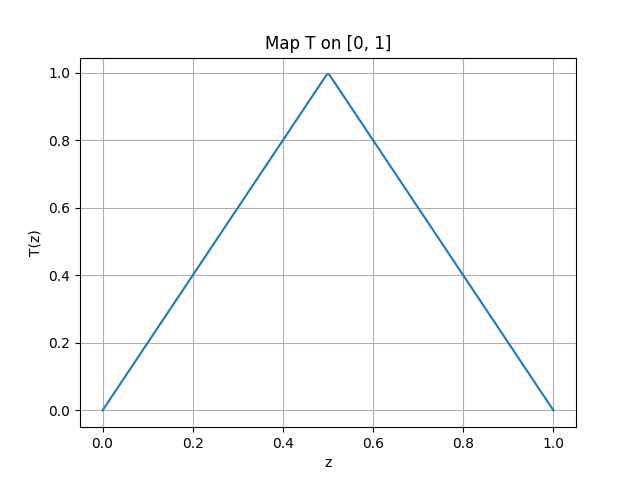

In [28]:
def T (z):
    if 0 <= z < 0.5:
        return 2 * z
    elif 0.5 <= z <= 1:
        return 2 * (1 - z)

plt.figure()
z = np.linspace(0, 1, 200)
Tz = [T(zi) for zi in z]
plt.plot(z, Tz)
plt.title("Map T on [0, 1]")
plt.xlabel("z")
plt.ylabel("T(z)")
plt.grid()
plt.show()

5. Can you use $T$ to find a $3$-periodic orbit of $f$? Verify your answer with SymPy and compare your result with question 3.
   

In [29]:
from sympy import Rational

f = lambda x: 4 * x * (1 - x)

# first check that 2/9 is a 3-periodic orbit of T
# T = lambda z: 2 * z if z < 0.5 else 2 * (1 - z)

phi = lambda x: sin(pi * x / 2) ** 2

# Compute f^3(2/9)
x = Rational(2, 9)
x = T(T(T(x)))
x

z_star = phi(x)

print(z_star)
print(f(f(f(z_star))))

0.11697777844051097
0.1169777784405109



Explaination of the above process

I found that $T^3(\frac{2}{9}) = \frac{2}{9}$ by pure luck, and it checks out. Then, by taking $z^* = \phi(x^*)$, 

$f^3(z^*)= \phi \circ T^3 \circ \phi^{-1} (z^*) = z^*$ <=> $f^3(z^*)= \phi \circ T^3(x^*)$ <=> $f^3(z^*)= \phi(x^*)$, so $z^*$ is a 3-periodic orbit of f.

6. Write code which computes the number of $p$-periodic *points* of $T$ and thus $f$ (a $p$-periodic orbit has $p$ $p$-periodic points). Denote this number $N_p$.
  
    Study the asymptotic behaviour of $N_p$; can you prove it? (You shouldn't use any notion more advanced than first-year university).
   
   Compute $N_p$ for a few values of $p$ and search for this list on the [OEIS](https://oeis.org). On the OEIS, find some Python code to generate these numbers and compare the result with your code.

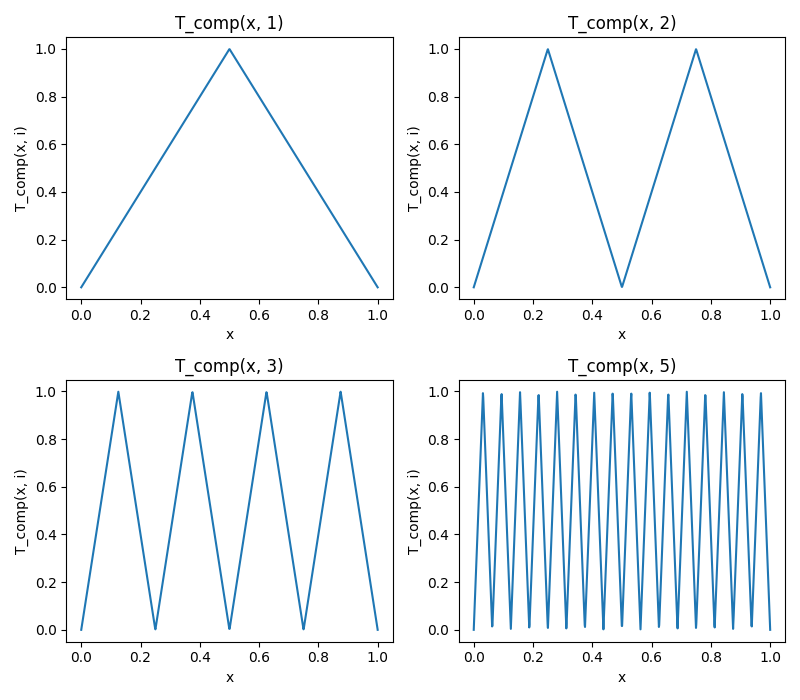

In [30]:
@np.vectorize
def T_comp (z, n):
    for _ in range(n):
        z = T(z)
    return z

fig, axes = plt.subplots(
    nrows=2, ncols=2,      # enough rows for 5 plots
    figsize=(8, 7)
)

axes = axes.flatten()

x = np.linspace(0, 1, 1000)

for ax, i in zip(axes, [1, 2, 3, 5]):
    ax.plot(x, T_comp(x, i))
    ax.set_title(f'T_comp(x, {i})')
    ax.set_xlabel('x')
    ax.set_ylabel('T_comp(x, i)')

# Remove the unused 6th subplot


plt.tight_layout()
plt.show()



To go about computing $N_p$, let's first compute the number of fixed points of $T^P$. Note that this is not the same thing since if $T^p(x^*) = 0$, $T^d(x^*) = 0$ might also be true for some $d | p$.

The idea here is that $T^p$ has (visually) $2^p$ "peaks".
Formally, $\forall p \in \mathbb{N}$, $T^{p+1}(x) = T^p(T(x)) = $

$$

\begin{cases}
    T^p(2x) \text{, if $x < 1/2$} \\
    T^p(2(1-x)) \text{, if $x \geq 1/2$}

\end{cases}$$

But since $T$ is symmetric about 1/2, the two branches are both just horrizontal compressions of $T^p$ about the line $x = 1$. We obtain the result that $T^p$ goes from 0 to 1 and back to 0 $2^p$ times. This will intersect $y=x$ exactly $2^{p+1}$ times, so $T^p$ has $2^{p+1}$ fixed points.

Hence $N_p = 2^{p} - \sum_{d | p} N_d $

In [31]:

def N(p):
    if p == 1:
        return 2
    total = 2 ** p
    for d in range(1, p):
        if p % d == 0:
            total -= N(d)
    return total

for p in range(1, 10):
    print(N(p) ,", ", end="")

# => link to OEIS sequence https://oeis.org/A027375

2 , 2 , 6 , 12 , 30 , 54 , 126 , 240 , 504 , 

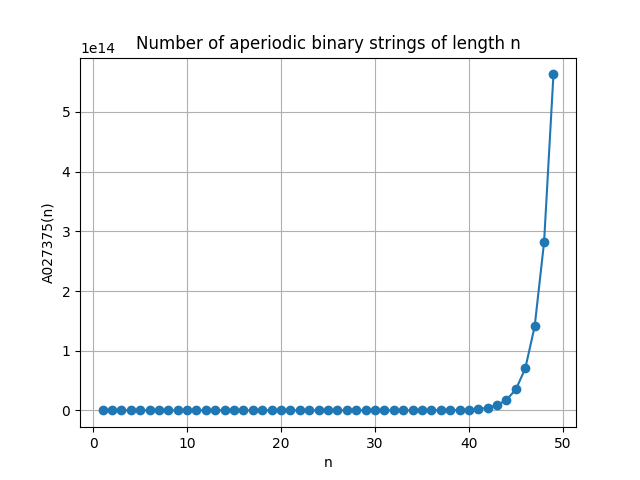

In [32]:
from sympy import divisors, mobius

def A027375(n: int) -> int:
    """Compute the number of aperiodic binary strings of length n."""
    return sum(mobius(d) * 2 ** (n // d) for d in divisors(n))


n_values = list(range(1, 50))
a_values = [A027375(n) for n in n_values]
plt.figure()
plt.plot(n_values, a_values, 'o-')
plt.xlabel('n')
plt.ylabel('A027375(n)')
plt.title('Number of aperiodic binary strings of length n')
plt.grid(True)
plt.show()

We observe that $N_p$ seems to grow exponentially.

Proof:

$N_p \geq 2^p - \sum_1^{p-2}$, since $p-1$ never divides $p$.


Now, this means that $\frac{1}{2} \cdot 2^p < N_p < 2^p$.
=> $N_p \sim 2^p$, hence the exponential growth. 

7. Iterate $T$ many times for various initial points and explain your results. Given a number in $[0,1]$, it can be represented by a sequence of $0$'s and $1$'s corresponding to its representation in binary. For instance, $3/8$ is represented by the sequence

   $$0, 1, 1, 0, 0, 0, \ldots$$

 What is the corresponding action of $T$ on such a sequence?
    Write a function which computes this action on the first $N$ digits of such a sequence (if given a string of length $N$, it should return a string of length $N-1$).
   Let $$z_0 = \sum_{k=1}^{\infty}2^{-k!}$$
   Does $T^{2026}(z_0)$ belong to $[0, 1/2)$ or $[1/2, 1]$?
    

To give a bit of context to my interpretation of the experimental results, I decided to first take a look at applying $T$ to the binary sequences.

Let $B(z) = (z)_{n>0}$ such that $$ 
z_i = \begin{cases}
    0, \text{if } z - \sum_1^{n-1} \frac{1}{2^i}z_i < 1/2 \\
    1,\text{ otherwise}
\end{cases} $$

This is the sequence described above, and we can see it has a similar structure with $T$.

So, if we define $T$ on the set of such sequences, we obtain

$$ T((z)_n) = \begin {cases} 

    (z_{n+1})_n \text{, if } z_1 = 0 \\
    (z')_n = (1-z_{n+1})_n \text{, if } z_1 = 1

\end{cases} $$

Note that to obtain this, we used the fact that 1 can be written as the sequence (1, 1, 1, ... ), since
$\sum_1^\infty \frac{1}{2^n} = 1$

Additionally, performing a multiplication by 2 in base 2 is a bitwise left shift by 1 bit, which is why 
$T((z)_n)_{n} = z_{n+1}$ or $T((z)_n)_{n} = 1 - z_{n+1}$ depending on the branch

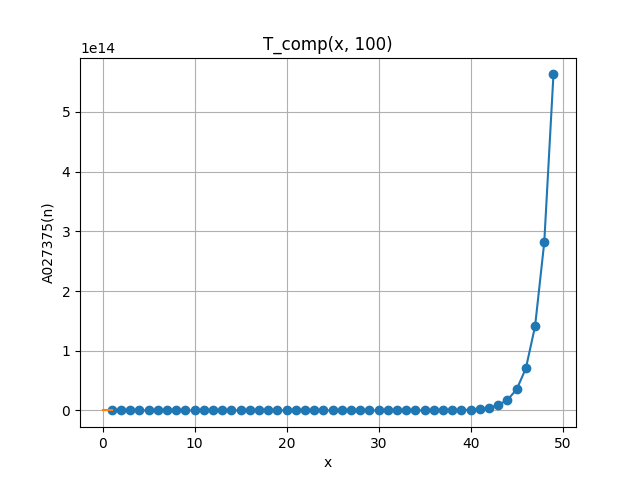

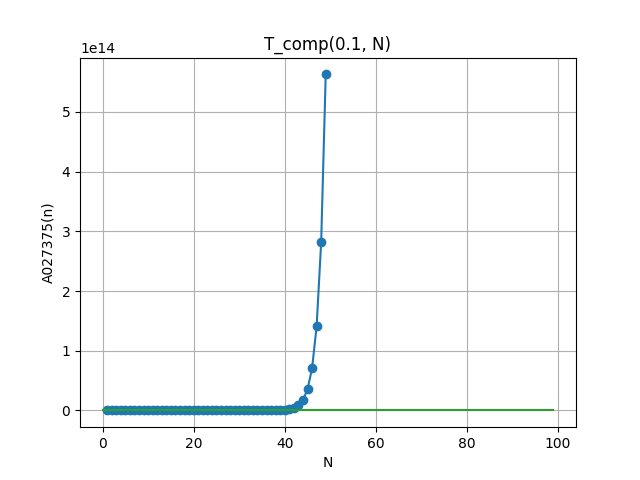

In [33]:
#iterate over various n to plot T_comp

N = 100
x = np.linspace(0, 1, 1000)
    
plt.plot(x, T_comp(x, N))
plt.title(f'T_comp(x, {N})')
plt.xlabel('x')
plt.show()

N_r = range(100)
plt.plot(N_r, T_comp(0.333, N_r))
plt.title(f'T_comp(0.1, N)')
plt.xlabel('N')
plt.show()

# from the plots drawn we can conclude that T^n converges to 0 for rationals of the form x/1000.

As an initial test, i tried plotting "np.linspace(0,1,1000)", and it turned out that $T^p$ always reached 0.
This should not happen, yet we see this result experimentally because of python's (and/or numpy's) way of storing floating point numbers.

By default, when python initialises a non integer number, it uses the IEEE-754 double-precision floating-point standard.

This means that it stores a certain number of bits (usually 53) to represent (what the interpreter considers as) the significant digits of the number. This happens in binary and is called the mantissa. (m)

The other 11 bits are used to store the exponent (e).

The result is a "pair" (m, e), that represents the number $m^e$. After studying the behaviour of $T$ on sequences of bits, it is very easy to spot the flaw of our experiment. With python only remembering a finite number of significant bits of the numbers it is operating on, eventually all those bits vanish ($(z_n)_n \longrightarrow (z_{n+1})_n$ derived previously, and the equivalent case for $z > 1/2$)

In reality, any rational that is NOT of the form $\frac{k}{2^p}, k,p \in \mathbb{N}$ has an infinite number of 1s in it's binary representation, just like any number of the form $\frac{1}{3^p}$ has an infinite number of non-zero digits in it's decimal representation.

The "rule" here is for a base-x representation of $\frac{p}{q}, gcd(p,q) = 1$ to have a finite number of non-zero digits, $\exists k: q | x^k$ must be satisfyed.

In [35]:
# we can use np.Rational to see a better representation of how rationals behave

def orbit_point(T, z0):
    seen = set()
    zn = z0
    for n in range(1, 1000):
        zn = T(zn)
        if zn in seen:
            return zn
        seen.add(zn)

print(orbit_point(T, Rational(1, 3)))  # should return 2/3
print(orbit_point(T, Rational(1, 6)))  # should return 2/3
print(orbit_point(T, Rational(1, 5)))  # should return 4/5

# now it is clear that rationals that are not of the form k/2^n eventually reach a NON-ZERO periodic orbit.

2/3
2/3
2/5


In [18]:
# applying T to a binary sequence of length n
def T_binseq(seq):
    n = len(seq)
    new_seq = [0] * (n-1)
    if seq[0] == 0:
        for i in range(n-1):
            new_seq[i] = seq[i+1]
    elif seq[0] == 1:
        for i in range(n-1):
            new_seq[i] = 1 - seq[i+1]
    return new_seq
    
# iterating a few times for simplification purposes.
z_0 = [0 for _ in range(30)] 

for i in range(5):
    z_0[factorial(i)] = 1

for i in range(25):
    z_0 = T_binseq(z_0)
    print(f"z_i={z_0}")

z_i=[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
z_i=[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
z_i=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
z_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

$$z_0 = \sum_{k=1}^{\infty}2^{-k!}$$
   Does $T^{2026}(z_0)$ belong to $[0, 1/2)$ or $[1/2, 1]$?

We will treat this in it's binary sequence form described and studied above.
$(z_0)_n = 1,1,0,0,0,1, ...$

It is important to note that, in the initial sequence is infinite and always contains an odd number of 0s between two consecutive 1s. The latter is because $2 | k! \forall k > 1$, therefore $(k+1)! - k! - 1$ is odd.

By looking at the above experiment, we see that, at least until we reach $2^{-4!}$ the sequence is preserved, except a few steps.

When the leading digit is a 1 (k!th digit originally), we invert the sequence and shift, so we see another 1 at the next step, therefore we invert again, to the original sequence.

We get that 

$$ T^P(z_0) = \begin{cases}

   z_0 \text{ shifted P times to the left, if } P \neq k! \\
   (1-z_0) \text{ shifted P times to the left otherwise}

\end{cases} $$

Since 2027 is not $k!$ for any natural number k, we conclude that $T^{2026}(z_0)$ has a leading 0 and hence $T^{2026}(z_0)< 1/2$.

8. Investigate the orbits of $(z_n)_{n\in \mathbb{N}}$, if $z_0 \in \mathbb{Q}$.

As described earlier, for any $z_0 = \frac{p}{q} \in \mathbb{Q}$, with gcd(p,q) = 1, p < q, we will write it as
$z_0 = 2^k \cdot \frac{p'}{q'}, k \in \mathbb{Z}$, taking out the power of 2. Unless $\frac{p'}{q'} = 1$, the sequence will always have a (P > 2)-orbit. We can find a value that is on its orbit by finding the periodic part of $z_0$'s binary representation and then we will apply T a finite number of times to find the first number in the sequence $z_n$ that will be on the orbit.

I will now provide code to perform this kind of experiments.

Notice that to obtain a rational number that is purely periodic from its period, we first compute $B = b_1b_2...b_p_{(2)}$

And then we use the geometric series $Z = \sum_{k=0}^\infty \frac{B}{2^{(1 + k)p}}$ => $Z - \frac{Z}{2^p} = \frac{B}{2^p}$

=> $Z = \frac{B}{(2^p-1)}$

In [14]:
from sympy import Rational

def int_to_binseq(n: int, length: int) -> list[int]:
    """Convert an integer n to a binary sequence of given length."""
    binseq = [0] * length
    for i in range(length):
        binseq[length - 1 - i] = (n >> i) & 1
    return binseq

def binseq_to_int(binseq: list[int]) -> int:
    """Convert a binary sequence to its integer representation."""
    n = 0
    length = len(binseq)
    for i in range(length):
        n += binseq[length - 1 - i] << i
    return n

def period_to_Rational(period: list[int]) -> Rational:
    """Convert a binary period sequence to its integer representation."""
    B = binseq_to_int(period)
    p = len(period)
    return Rational((B), (2 ** p - 1))


def period_flip(z_0: tuple[int, int]) -> tuple[list[int], bool]:
    z_rational = Rational(z_0[0], z_0[1])
    seen_at = dict()
    z_bin = [0] # keeping the unit bit for simplicity
    flip = 0
    for i in range(1,10000):
        # print (f"Iteration {i}, z={z_rational}, bin={z_bin}, flip={flip}")
        if z_rational in seen_at:
            start = seen_at[z_rational]
            period = z_bin[start:i]
            exponent = i - start
            return period, flip
        seen_at[z_rational] = i
        if z_rational >= Rational(1, 2):
            z_bin.append(1)
            z_rational = 2 * (z_rational - Rational(1, 2))
        else: 
            z_bin.append(0)
            z_rational = 2 * z_rational
        
        if z_bin[-1] != z_bin[-2]:
            flip ^= 1
    return [], 0  # No period found within 10000 iterations [unlikely]

# note that # changes from 0 to 1 or 1 to 0 in the sequence indicate the number of accesses of the second branch of T
# => the actual number that will appear in the orbitis either (period) or ~(period)

# it is easy to find these numbers for rationals, but this function is just here to check the other ones.
def in_orbit_of (z_0: Rational):
    period, flip = period_flip((z_0.numerator, z_0.denominator))
    # print(f"Period: {period}, Flip: {flip}")
    
    period_Rational = period_to_Rational(period)
    if flip % 2 == 0:
        return period_Rational
    else:
        return 1 - period_Rational
    
print(in_orbit_of(Rational(1, 3)))
print(in_orbit_of(Rational(2, 9)))
print(in_orbit_of(Rational(4, 15)))

print (in_orbit_of(Rational(1, 7)))

Iteration 1, z=1/3, bin=[0], flip=0
Iteration 2, z=2/3, bin=[0, 0], flip=0
Iteration 3, z=1/3, bin=[0, 0, 1], flip=1
Period: [0, 1], Flip: 1
2/3
Iteration 1, z=2/9, bin=[0], flip=0
Iteration 2, z=4/9, bin=[0, 0], flip=0
Iteration 3, z=8/9, bin=[0, 0, 0], flip=0
Iteration 4, z=7/9, bin=[0, 0, 0, 1], flip=1
Iteration 5, z=5/9, bin=[0, 0, 0, 1, 1], flip=1
Iteration 6, z=1/9, bin=[0, 0, 0, 1, 1, 1], flip=1
Iteration 7, z=2/9, bin=[0, 0, 0, 1, 1, 1, 0], flip=0
Period: [0, 0, 1, 1, 1, 0], Flip: 0
2/9
Iteration 1, z=4/15, bin=[0], flip=0
Iteration 2, z=8/15, bin=[0, 0], flip=0
Iteration 3, z=1/15, bin=[0, 0, 1], flip=1
Iteration 4, z=2/15, bin=[0, 0, 1, 0], flip=0
Iteration 5, z=4/15, bin=[0, 0, 1, 0, 0], flip=0
Period: [0, 1, 0, 0], Flip: 0
4/15
Iteration 1, z=1/7, bin=[0], flip=0
Iteration 2, z=2/7, bin=[0, 0], flip=0
Iteration 3, z=4/7, bin=[0, 0, 0], flip=0
Iteration 4, z=1/7, bin=[0, 0, 0, 1], flip=1
Period: [0, 0, 1], Flip: 1
6/7


As a conclusion, we can say that $(x_n)_n = (x_0, T(x_0), T^2(x_0)...)$ eventually reaches an orbit if and only if $x \in \mathbb{Q}$.

Furthermore, we can go back to our original function, $f(x) = 4x(1-x)$ and state that, thanks to the fact that $ f= \phi \circ T \circ \phi^{-1}$, $f(x)$ reaches an orbit if and only if $x = \phi(r)$ for some $r \in \mathbb{Q}$.

That is, we will find an orbit of f by iterating it on $x_0$ <=> $\frac{2}{\pi}arcsin(\sqrt x) \in \mathbb{Q}$.

In [ ]:
# example, using sympy for mathematical precision.

# example, using sympy for mathematical precision.

x = var('x', real=True)

x = Rational(6, 7)

x_0 = sp.sin(sp.pi * x / 2) ** 2

print(x_0)

seen = set()

while x_0 not in seen:
    seen.add(x_0)
    x_0 = sp.simplify(f(x_0))
    print(x_0)

# see below that 6/7 leads to a 6-period in the logistic map.

sin(3*pi/7)**2
1/2 - cos(2*pi/7)/2
cos(3*pi/14)**2
cos(pi/7)/2 + 1/2
sin(pi/7)**2
cos(3*pi/7)/2 + 1/2
cos(pi/14)**2
1/2 - cos(2*pi/7)/2
